### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd 
import seaborn as sns

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
data = pd.read_csv("Data.csv")
item = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
print("Data info")
print(data.info())
print("\n\nData shape")
print(data.shape)
print("\n\nData describe")
print(data.describe())
print("\n\nNumber of missing values in Data.csv: ", data.isnull().sum().sum())

print("\n\nUser info")
print(user.info())
print("\n\nUser shape")
print(user.shape)
print("\n\nUser describe")
print(user.describe())
print("\n\nNumber of missing values in User.csv: ", user.isnull().sum().sum())

print("\n\nItem info")
print(item.info())
print("\n\nItem shape")
print(item.shape)
print("\n\nItem describe")
print(item.describe())
print("\n\nNumber of missing values in Item.csv: ", item.isnull().sum().sum())

Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
None


Data shape
(100000, 4)


Data describe
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08


Number of missing values in Data.csv:  0


User info
<class 'pandas.core.frame.

#### 4. Find the number of movies per genre using the item data - 5 marks

In [4]:
# use sum on the default axis
column_list = list(item)
column_list.remove("movie id")
column_list.remove("movie title")
column_list.remove("release date")
print(item[column_list].sum())

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


#### 5. Find the movies that have more than one genre - 2.5 marks

In [5]:
#hint: use sum on the axis = 1
column_list = list(item)
column_list.remove("movie id")
column_list.remove("movie title")
column_list.remove("release date")
num =  item[column_list].sum(axis=1)
print((num > 1).sum())

849


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [6]:
item = item[item.unknown == 0]
item.shape

(1680, 22)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [7]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [8]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


['user id', 'age', 'gender', 'occupation', 'zip code']


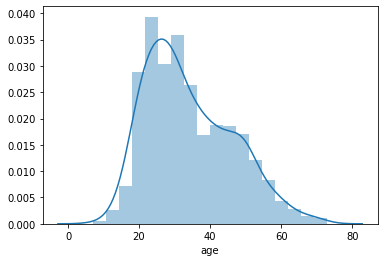

In [9]:
#your answers here

# plot for age
print(list(user))
sns.distplot(user['age'])

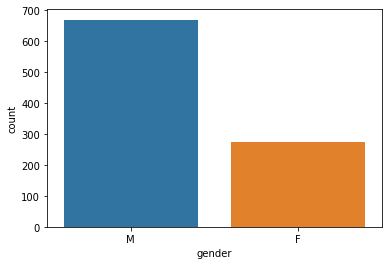

In [10]:
# plot for gender
sns.countplot(user['gender'])

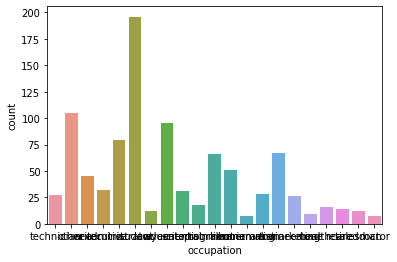

In [11]:
# plot for occupation
sns.countplot(user['occupation'])

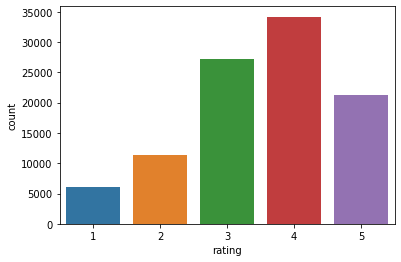

In [12]:
# plot for rating
sns.countplot(data['rating'])


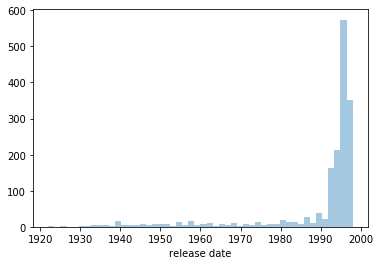

In [13]:
# plot for release date
release_date = item['release date']
sns.distplot(release_date.transform(lambda x: x.split('-')[2]).astype(int), kde=False)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

              Action  Adventure  Animation  Childrens  Comedy  Crime  \
release date                                                           
1922               0          0          0          0       0      0   
1926               0          0          0          0       0      0   
1930               0          0          0          0       0      0   
1931               0          0          0          0       0      1   
1932               0          0          0          0       0      0   
1933               0          0          0          0       1      0   
1934               0          0          0          0       2      0   
1935               0          0          0          0       2      0   
1936               0          0          0          0       1      0   
1937               0          0          1          1       2      0   
1938               1          1          0          0       1      0   
1939               0          1          0          2       2   

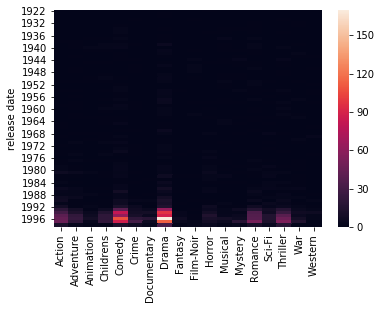

In [14]:
#Your answer here
column_list = list(item)
column_list.remove("movie id")
column_list.remove("movie title")
column_list.remove("unknown")
genres = item[column_list].copy(deep=True)
genres['release date'] = genres['release date'].transform(lambda x: x.split('-')[2]).astype(int)
genres = genres.groupby(['release date']).sum()
print(genres)

sns.heatmap(genres)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [15]:
#your answer here
column_list = ["movie id","movie title"]
column_list_2 = ["movie id","rating"]
merged = data[column_list_2].merge(item[column_list], left_on='movie id', right_on='movie id')
merged['size'] = merged.groupby('movie id')['movie id'].transform('size')
grouped = merged.groupby(column_list).mean()

print(grouped[grouped['size'] > 100].sort_values(by=['rating'], ascending=False).head(10))

                                       rating   size
movie id movie title                                
408      Close Shave, A              4.491071  112.0
318      Schindler's List            4.466443  298.0
169      Wrong Trousers, The         4.466102  118.0
483      Casablanca                  4.456790  243.0
64       Shawshank Redemption, The   4.445230  283.0
603      Rear Window                 4.387560  209.0
12       Usual Suspects, The         4.385768  267.0
50       Star Wars                   4.358491  583.0
178      12 Angry Men                4.344000  125.0
134      Citizen Kane                4.292929  198.0


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [16]:
column_list = ["movie id","movie title"]
column_list_2 = ["movie id","rating"]
joined = data.merge(item, left_on='movie id', right_on='movie id').merge(user, left_on='user id', right_on='user id')

column_list = ['Drama', 'Romance', 'Sci-Fi','gender']
joined['total'] = joined.groupby('gender')['gender'].transform('size')
final = joined[column_list].groupby('gender').sum().merge(joined[['total', 'gender']].groupby('gender').mean(), left_on='gender', right_on='gender')
print("Ratio of Drama movies watched : ")
print(final['Drama']/final['total'])
print("Ratio of Romance movies watched : ")
print(final['Romance']/final['total'])
print("Ratio of Sci-Fi movies watched : ")
print(final['Sci-Fi']/final['total'])

Ratio of Drama movies watched : 
gender
F    0.427694
M    0.389040
dtype: float64
Ratio of Romance movies watched : 
gender
F    0.227601
M    0.183200
dtype: float64
Ratio of Sci-Fi movies watched : 
gender
F    0.102145
M    0.136037
dtype: float64


#### Conclusion:
1. There is no data point null or missing
2. Number of movies by genre:
    Action         251
    Adventure      135
    Animation       42
    Childrens      122
    Comedy         505
    Crime          109
    Documentary     50
    Drama          725
    Fantasy         22
    Film-Noir       24
    Horror          92
    Musical         56
    Mystery         61
    Romance        247
    Sci-Fi         101
    Thriller       251
    War             71
    Western         27
3. There are 849 movies with more than 1 genre
4. Top movies:
                                           rating   size
    movie id movie title                                
    408      Close Shave, A              4.491071  112.0
    318      Schindler's List            4.466443  298.0
    169      Wrong Trousers, The         4.466102  118.0
    483      Casablanca                  4.456790  243.0
    64       Shawshank Redemption, The   4.445230  283.0
    603      Rear Window                 4.387560  209.0
    12       Usual Suspects, The         4.385768  267.0
    50       Star Wars                   4.358491  583.0
    178      12 Angry Men                4.344000  125.0
    134      Citizen Kane                4.292929  198.0
5.